In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fontsize = 20
plt.rc('font', size=fontsize)  # Set global font size
plt.rc('axes', titlesize=fontsize)  # Set global title font size
plt.rc('axes', labelsize=fontsize)  # Set global axis label font size
plt.rc('xtick', labelsize=fontsize)  # Set global X-axis tick label font size
plt.rc('ytick', labelsize=fontsize)  # Set global Y-axis tick label font size
plt.rc('legend', fontsize=fontsize)  # Set global legend font size

In [7]:
def a(tau_m,g_in,g_E,g_L,g_I=0):
    return(1+(g_in+g_E+g_I)/g_L)/tau_m

def b(tau_m,g_in,g_E,g_L,R_L,R_E,g_I=0,R_I=-80):
    return(R_L+(g_in+g_E)*R_E/g_L+g_I*R_I/g_L)/tau_m

def v_bar(a,b,x0,x1):
    return b/a+(x0-x1)/(np.log((a*x0-b)/(a*x1-b)))

In [8]:
fre=4
g_E=0
g_I=0
theta = np.arange(0,600)/600
g_in = 12+1.5*np.cos(theta*np.pi*fre*2)
a2 = a(3,g_in,g_E,10,g_I)
b2 = b(3,g_in,g_E,10,-70,0,g_I)
v_bar2 = v_bar(a2,b2,-56,-50)

In [9]:
v_min = []
v_max = []
for amp in range(-80,80):
    fre=4
    g_E=np.max([-amp/10,0])
    g_I=np.max([amp/10,0])
    theta = np.arange(0,600)/600
    g_in = 12+1.5*np.cos(theta*np.pi*fre*2)
    a2 = a(3,g_in,g_E,10,g_I)
    b2 = b(3,g_in,g_E,10,-70,0,g_I,-100)
    v_bar2 = v_bar(a2,b2,-56,-50)
    v_min.append(v_bar2[0])
    v_max.append(v_bar2[75])
v_min = np.asarray(v_min)
v_max = np.asarray(v_max)

/tmp/ipykernel_643517/3331931206.py:8: RuntimeWarning: divide by zero encountered in divide
  return b/a+(x0-x1)/(np.log((a*x0-b)/(a*x1-b)))
/tmp/ipykernel_643517/3331931206.py:8: RuntimeWarning: invalid value encountered in log
  return b/a+(x0-x1)/(np.log((a*x0-b)/(a*x1-b)))


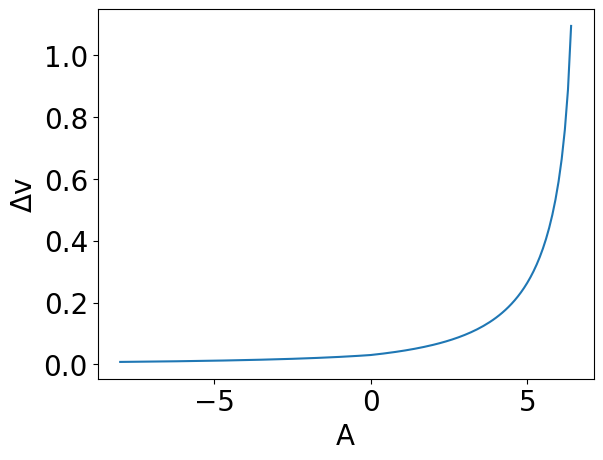

In [10]:
plt.plot(np.arange(-80,80)/10,v_max-v_min)
plt.xlabel('A')
plt.ylabel(r'$\Delta$v')
plt.savefig("amp.pdf",format='pdf', bbox_inches="tight")

In [11]:
from scipy.optimize import curve_fit

# Define exponential function model
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Generate some example data
x_data = np.arange(-80, 80) / 10
y_data = v_max - v_min

# Fit the exponential function model
popt, pcov = curve_fit(exponential_func, x_data, y_data)

# Extract fitting parameters
a, b, c = popt

# Generate the fitted curve
x_fit = np.linspace(-8, 8, 600)
y_fit = exponential_func(x_fit, a, b, c)

# Plot the original data and fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Exponential Fit')
plt.yscale('log')
plt.legend()
plt.xlabel('amp')
plt.ylabel('delta on v')
plt.title('Exponential Fit of Data')
plt.grid()

ValueError: array must not contain infs or NaNs

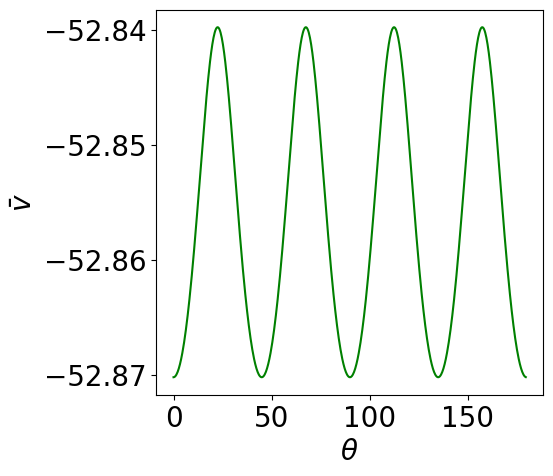

In [ ]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(5,5))
plt.plot(theta * 180, v_bar2, 'g')
plt.ylabel(r'$\bar{v}$')
plt.xlabel(r'$\theta$')
plt.savefig("thoery_no.pdf", format='pdf', bbox_inches="tight")
# Get the current axis
# ax = plt.gca()

# Set the y-axis format to two decimal places
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))